In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mdd_lrr.utils import backtrack, l2_prox, ipalm, alpha_type1, alpha_type2

In [2]:
class mdd_xlr(): 
    
    def __init__(self, d, ns, nr, nk, dtype=None): 
        self.d = d.reshape(ns, nr)
        self.xshape = [(nr, nk), (nk, nr)]
        
    def forward(self, x): 
        ret = self.d
        for idx, item in enumerate(x):
            ret = ret.dot(item.reshape(self.xshape[idx]))
        return ret.ravel()
    
    def adjoint(self, res, zz, idx): 
        
        res = res.reshape(self.d.shape)
        if 0 == idx:
            ret = self.d.conj().T.dot(res).dot(zz.reshape(self.xshape[1]).conj().T)
        if 1 == idx:
            ret = self.d.dot(zz.reshape(self.xshape[0])).conj().T.dot(res)  
        return ret.ravel()

In [3]:
ns, nr, nk = 111, 101, 101//10
d = np.random.rand(ns, nr) + np.random.rand(ns, nr)*1j

l_t = np.random.rand(nr, nk) + np.random.rand(nr, nk)*1j
r_t = np.random.rand(nk, nr) + np.random.rand(nk, nr)*1j

u = d.dot(l_t).dot(r_t).ravel()

In [4]:
l0 = np.random.rand(nr*nk) + np.random.rand(nr*nk)*1j
r0 = np.random.rand(nk*nr) + np.random.rand(nk*nr)*1j

In [5]:
Op = mdd_xlr(d, ns, nr, nk)

In [6]:
beta = [None, None]

tau = [1e-1, 1e-1]

prox = [l2_prox, l2_prox]


In [7]:
ret = ipalm(Op, u, prox, tau, alpha_type1(), iter_lim=3000, x0=[l0, r0], tol=1e-5, show=True)

niter       data_residual           norm_grad       rel_grad_diff

    0           10243.475        15236261.190            1.000000
    1            4053.208        36967028.424            1.242602
    2             810.632         6896824.135            0.798888
    3             711.557          685416.083            0.896981
    4             710.092           79027.083            0.791308
    5             709.992           10158.663            0.405565
    6             709.907            4830.353            0.052217
    7             709.824            4718.633            0.001308
    8             709.740            4716.785            0.000184
    9             709.656            4716.121            0.000169
   10             709.572            4715.497            0.000169
   11             709.489            4714.872            0.000169
   12             709.405            4714.247            0.000169
   13             709.321            4713.622            0.000169
   14    

  199             694.094            4600.440            0.000168
  200             694.014            4599.847            0.000168
  201             693.934            4599.255            0.000168
  202             693.854            4598.663            0.000168
  203             693.774            4598.071            0.000168
  204             693.694            4597.479            0.000168
  205             693.614            4596.887            0.000168
  206             693.534            4596.295            0.000168
  207             693.454            4595.704            0.000168
  208             693.374            4595.112            0.000168
  209             693.294            4594.521            0.000168
  210             693.215            4593.930            0.000168
  211             693.135            4593.340            0.000168
  212             693.055            4592.749            0.000168
  213             692.975            4592.159            0.000168
  214     

  421             676.775            4472.882            0.000166
  422             676.699            4472.326            0.000166
  423             676.623            4471.769            0.000166
  424             676.547            4471.212            0.000166
  425             676.471            4470.656            0.000166
  426             676.395            4470.100            0.000166
  427             676.319            4469.544            0.000166
  428             676.244            4468.988            0.000166
  429             676.168            4468.432            0.000166
  430             676.092            4467.877            0.000166
  431             676.016            4467.322            0.000166
  432             675.940            4466.766            0.000166
  433             675.865            4466.211            0.000166
  434             675.789            4465.656            0.000166
  435             675.713            4465.102            0.000166
  436     

  639             660.636            4355.119            0.000165
  640             660.564            4354.595            0.000165
  641             660.492            4354.072            0.000165
  642             660.420            4353.548            0.000165
  643             660.348            4353.025            0.000165
  644             660.276            4352.502            0.000165
  645             660.204            4351.979            0.000165
  646             660.132            4351.456            0.000165
  647             660.060            4350.933            0.000165
  648             659.988            4350.410            0.000165
  649             659.916            4349.888            0.000165
  650             659.844            4349.365            0.000165
  651             659.772            4348.843            0.000165
  652             659.700            4348.321            0.000165
  653             659.628            4347.799            0.000165
  654     

  883             643.548            4231.565            0.000163
  884             643.480            4231.075            0.000163
  885             643.412            4230.586            0.000163
  886             643.344            4230.097            0.000163
  887             643.276            4229.609            0.000163
  888             643.208            4229.120            0.000163
  889             643.140            4228.631            0.000163
  890             643.072            4228.143            0.000163
  891             643.004            4227.655            0.000163
  892             642.937            4227.167            0.000163
  893             642.869            4226.679            0.000163
  894             642.801            4226.191            0.000163
  895             642.733            4225.703            0.000163
  896             642.665            4225.216            0.000163
  897             642.598            4224.728            0.000163
  898     

 1116             628.147            4121.218            0.000162
 1117             628.083            4120.760            0.000162
 1118             628.019            4120.302            0.000162
 1119             627.955            4119.844            0.000162
 1120             627.891            4119.386            0.000162
 1121             627.826            4118.928            0.000162
 1122             627.762            4118.471            0.000162
 1123             627.698            4118.013            0.000162
 1124             627.634            4117.556            0.000162
 1125             627.570            4117.099            0.000162
 1126             627.506            4116.642            0.000162
 1127             627.442            4116.185            0.000162
 1128             627.378            4115.728            0.000162
 1129             627.314            4115.272            0.000162
 1130             627.250            4114.815            0.000162
 1131     

 1350             613.540            4017.457            0.000160
 1351             613.480            4017.028            0.000160
 1352             613.419            4016.599            0.000160
 1353             613.358            4016.171            0.000160
 1354             613.298            4015.742            0.000160
 1355             613.237            4015.314            0.000160
 1356             613.177            4014.886            0.000160
 1357             613.116            4014.457            0.000160
 1358             613.056            4014.030            0.000160
 1359             612.995            4013.602            0.000160
 1360             612.935            4013.174            0.000160
 1361             612.874            4012.746            0.000160
 1362             612.814            4012.319            0.000160
 1363             612.753            4011.891            0.000160
 1364             612.693            4011.464            0.000160
 1365     

 1550             601.708            3934.077            0.000159
 1551             601.650            3933.672            0.000159
 1552             601.592            3933.267            0.000159
 1553             601.535            3932.863            0.000159
 1554             601.477            3932.458            0.000158
 1555             601.419            3932.053            0.000158
 1556             601.362            3931.649            0.000158
 1557             601.304            3931.244            0.000158
 1558             601.247            3930.840            0.000158
 1559             601.189            3930.436            0.000158
 1560             601.131            3930.032            0.000158
 1561             601.074            3929.628            0.000158
 1562             601.016            3929.225            0.000158
 1563             600.959            3928.821            0.000158
 1564             600.901            3928.417            0.000158
 1565     

 1742             590.890            3858.411            0.000157
 1743             590.835            3858.028            0.000157
 1744             590.780            3857.645            0.000157
 1745             590.725            3857.262            0.000157
 1746             590.670            3856.879            0.000157
 1747             590.615            3856.496            0.000157
 1748             590.560            3856.113            0.000157
 1749             590.505            3855.731            0.000157
 1750             590.450            3855.349            0.000157
 1751             590.395            3854.966            0.000157
 1752             590.340            3854.584            0.000157
 1753             590.286            3854.202            0.000157
 1754             590.231            3853.820            0.000157
 1755             590.176            3853.438            0.000157
 1756             590.121            3853.056            0.000157
 1757     

 1929             580.843            3788.662            0.000156
 1930             580.790            3788.299            0.000156
 1931             580.738            3787.936            0.000156
 1932             580.686            3787.574            0.000156
 1933             580.633            3787.211            0.000156
 1934             580.581            3786.849            0.000156
 1935             580.528            3786.487            0.000156
 1936             580.476            3786.124            0.000156
 1937             580.424            3785.762            0.000156
 1938             580.371            3785.400            0.000156
 1939             580.319            3785.038            0.000156
 1940             580.267            3784.677            0.000156
 1941             580.214            3784.315            0.000156
 1942             580.162            3783.954            0.000156
 1943             580.110            3783.592            0.000156
 1944     

 2110             571.561            3724.713            0.000154
 2111             571.511            3724.369            0.000154
 2112             571.460            3724.025            0.000154
 2113             571.410            3723.682            0.000154
 2114             571.360            3723.338            0.000154
 2115             571.310            3722.995            0.000154
 2116             571.260            3722.651            0.000154
 2117             571.210            3722.308            0.000154
 2118             571.160            3721.965            0.000154
 2119             571.110            3721.622            0.000154
 2120             571.060            3721.279            0.000154
 2121             571.010            3720.936            0.000154
 2122             570.960            3720.594            0.000154
 2123             570.910            3720.251            0.000154
 2124             570.860            3719.909            0.000154
 2125     

 2301             562.219            3660.887            0.000153
 2302             562.171            3660.563            0.000153
 2303             562.123            3660.238            0.000153
 2304             562.076            3659.914            0.000153
 2305             562.028            3659.590            0.000153
 2306             561.980            3659.265            0.000153
 2307             561.933            3658.941            0.000153
 2308             561.885            3658.617            0.000153
 2309             561.837            3658.294            0.000153
 2310             561.790            3657.970            0.000153
 2311             561.742            3657.646            0.000153
 2312             561.695            3657.323            0.000153
 2313             561.647            3656.999            0.000153
 2314             561.599            3656.676            0.000153
 2315             561.552            3656.353            0.000153
 2316     

 2492             553.324            3600.680            0.000151
 2493             553.279            3600.374            0.000151
 2494             553.233            3600.068            0.000151
 2495             553.188            3599.762            0.000151
 2496             553.142            3599.457            0.000151
 2497             553.097            3599.151            0.000151
 2498             553.052            3598.846            0.000151
 2499             553.006            3598.540            0.000151
 2500             552.961            3598.235            0.000151
 2501             552.916            3597.930            0.000151
 2502             552.870            3597.625            0.000151
 2503             552.825            3597.320            0.000151
 2504             552.780            3597.015            0.000151
 2505             552.735            3596.710            0.000151
 2506             552.689            3596.405            0.000151
 2507     

 2680             544.988            3544.827            0.000150
 2681             544.945            3544.539            0.000150
 2682             544.902            3544.251            0.000150
 2683             544.858            3543.963            0.000149
 2684             544.815            3543.675            0.000149
 2685             544.772            3543.387            0.000149
 2686             544.729            3543.099            0.000149
 2687             544.686            3542.811            0.000149
 2688             544.642            3542.524            0.000149
 2689             544.599            3542.236            0.000149
 2690             544.556            3541.949            0.000149
 2691             544.513            3541.662            0.000149
 2692             544.470            3541.374            0.000149
 2693             544.427            3541.087            0.000149
 2694             544.383            3540.800            0.000149
 2695     

 2862             537.298            3493.873            0.000148
 2863             537.257            3493.601            0.000148
 2864             537.216            3493.330            0.000148
 2865             537.175            3493.058            0.000148
 2866             537.133            3492.787            0.000148
 2867             537.092            3492.515            0.000148
 2868             537.051            3492.244            0.000148
 2869             537.010            3491.973            0.000148
 2870             536.969            3491.702            0.000148
 2871             536.927            3491.431            0.000148
 2872             536.886            3491.160            0.000148
 2873             536.845            3490.889            0.000148
 2874             536.804            3490.619            0.000148
 2875             536.763            3490.348            0.000148
 2876             536.722            3490.077            0.000148
 2877     

In [8]:
ret = ipalm(Op, u, prox, tau, alpha_type2(), iter_lim=3000, x0=[l0, r0], tol=1e-5, show=True)

niter       data_residual           norm_grad       rel_grad_diff

    0             983.485        15236261.190            1.000000
    1            1069.266        10263948.065            0.409443
    2             715.803         1400089.040            0.843119
    3             710.204          155051.683            0.848029
    4             710.056           18289.197            0.557626
    5             709.972            5133.736            0.119846
    6             709.888            4732.119            0.004265
    7             709.804            4725.604            0.000229
    8             709.720            4724.958            0.000170
    9             709.636            4724.326            0.000169
   10             709.553            4723.699            0.000169
   11             709.469            4723.072            0.000169
   12             709.385            4722.446            0.000169
   13             709.302            4721.820            0.000169
   14    

  170             696.401            4625.653            0.000168
  171             696.320            4625.054            0.000168
  172             696.239            4624.455            0.000168
  173             696.159            4623.856            0.000168
  174             696.078            4623.258            0.000168
  175             695.998            4622.660            0.000168
  176             695.917            4622.061            0.000168
  177             695.837            4621.463            0.000168
  178             695.756            4620.866            0.000168
  179             695.676            4620.268            0.000168
  180             695.595            4619.670            0.000168
  181             695.515            4619.073            0.000168
  182             695.434            4618.476            0.000168
  183             695.354            4617.879            0.000168
  184             695.273            4617.282            0.000168
  185     

  362             681.260            4513.671            0.000167
  363             681.183            4513.103            0.000167
  364             681.106            4512.536            0.000167
  365             681.029            4511.969            0.000167
  366             680.952            4511.402            0.000167
  367             680.875            4510.835            0.000167
  368             680.798            4510.268            0.000167
  369             680.721            4509.701            0.000167
  370             680.644            4509.135            0.000167
  371             680.568            4508.568            0.000167
  372             680.491            4508.002            0.000167
  373             680.414            4507.436            0.000167
  374             680.337            4506.870            0.000167
  375             680.260            4506.305            0.000167
  376             680.183            4505.739            0.000167
  377     

  523             669.087            4424.302            0.000166
  524             669.013            4423.760            0.000166
  525             668.938            4423.217            0.000166
  526             668.864            4422.675            0.000166
  527             668.790            4422.133            0.000166
  528             668.716            4421.591            0.000166
  529             668.642            4421.049            0.000166
  530             668.568            4420.507            0.000166
  531             668.494            4419.965            0.000166
  532             668.420            4419.424            0.000166
  533             668.346            4418.883            0.000166
  534             668.272            4418.342            0.000166
  535             668.198            4417.801            0.000166
  536             668.124            4417.260            0.000166
  537             668.050            4416.719            0.000166
  538     

  649             659.881            4357.114            0.000165
  650             659.809            4356.590            0.000165
  651             659.737            4356.066            0.000165
  652             659.665            4355.543            0.000165
  653             659.594            4355.019            0.000165
  654             659.522            4354.496            0.000165
  655             659.450            4353.973            0.000165
  656             659.378            4353.450            0.000165
  657             659.306            4352.927            0.000165
  658             659.234            4352.404            0.000165
  659             659.162            4351.882            0.000165
  660             659.091            4351.360            0.000165
  661             659.019            4350.837            0.000165
  662             658.947            4350.315            0.000165
  663             658.875            4349.793            0.000165
  664     

  831             647.068            4264.146            0.000164
  832             646.999            4263.648            0.000164
  833             646.930            4263.151            0.000164
  834             646.861            4262.653            0.000164
  835             646.792            4262.155            0.000164
  836             646.724            4261.658            0.000164
  837             646.655            4261.161            0.000164
  838             646.586            4260.664            0.000164
  839             646.517            4260.167            0.000164
  840             646.449            4259.670            0.000164
  841             646.380            4259.174            0.000164
  842             646.311            4258.677            0.000164
  843             646.242            4258.181            0.000164
  844             646.174            4257.685            0.000164
  845             646.105            4257.189            0.000164
  846     

 1030             633.689            4167.767            0.000162
 1031             633.623            4167.296            0.000162
 1032             633.558            4166.825            0.000162
 1033             633.492            4166.355            0.000162
 1034             633.427            4165.884            0.000162
 1035             633.361            4165.414            0.000162
 1036             633.296            4164.944            0.000162
 1037             633.230            4164.473            0.000162
 1038             633.165            4164.003            0.000162
 1039             633.099            4163.534            0.000162
 1040             633.034            4163.064            0.000162
 1041             632.968            4162.594            0.000162
 1042             632.903            4162.125            0.000162
 1043             632.837            4161.656            0.000162
 1044             632.772            4161.187            0.000162
 1045     

 1181             623.962            4098.141            0.000161
 1182             623.899            4097.690            0.000161
 1183             623.836            4097.238            0.000161
 1184             623.772            4096.787            0.000161
 1185             623.709            4096.336            0.000161
 1186             623.646            4095.886            0.000161
 1187             623.583            4095.435            0.000161
 1188             623.520            4094.984            0.000161
 1189             623.457            4094.534            0.000161
 1190             623.394            4094.084            0.000161
 1191             623.331            4093.633            0.000161
 1192             623.267            4093.183            0.000161
 1193             623.204            4092.734            0.000161
 1194             623.141            4092.284            0.000161
 1195             623.078            4091.834            0.000161
 1196     

 1351             613.434            4023.218            0.000160
 1352             613.374            4022.787            0.000160
 1353             613.313            4022.357            0.000160
 1354             613.253            4021.927            0.000160
 1355             613.192            4021.498            0.000160
 1356             613.131            4021.068            0.000160
 1357             613.071            4020.638            0.000160
 1358             613.010            4020.209            0.000160
 1359             612.950            4019.780            0.000160
 1360             612.889            4019.351            0.000160
 1361             612.829            4018.921            0.000160
 1362             612.768            4018.493            0.000160
 1363             612.708            4018.064            0.000160
 1364             612.647            4017.635            0.000160
 1365             612.587            4017.206            0.000160
 1366     

 1476             605.971            3970.383            0.000159
 1477             605.912            3969.968            0.000159
 1478             605.853            3969.553            0.000159
 1479             605.795            3969.138            0.000159
 1480             605.736            3968.723            0.000159
 1481             605.677            3968.308            0.000159
 1482             605.618            3967.894            0.000159
 1483             605.560            3967.479            0.000159
 1484             605.501            3967.065            0.000159
 1485             605.442            3966.651            0.000159
 1486             605.384            3966.237            0.000159
 1487             605.325            3965.823            0.000159
 1488             605.267            3965.409            0.000159
 1489             605.208            3964.995            0.000159
 1490             605.149            3964.582            0.000159
 1491     

 1658             595.510            3896.747            0.000158
 1659             595.454            3896.353            0.000158
 1660             595.398            3895.959            0.000158
 1661             595.342            3895.566            0.000158
 1662             595.286            3895.172            0.000158
 1663             595.230            3894.778            0.000158
 1664             595.174            3894.385            0.000158
 1665             595.118            3893.991            0.000158
 1666             595.061            3893.598            0.000158
 1667             595.005            3893.205            0.000158
 1668             594.949            3892.812            0.000158
 1669             594.893            3892.419            0.000158
 1670             594.837            3892.026            0.000158
 1671             594.781            3891.633            0.000158
 1672             594.725            3891.241            0.000158
 1673     

 1793             588.053            3844.565            0.000157
 1794             587.999            3844.186            0.000157
 1795             587.945            3843.807            0.000157
 1796             587.890            3843.428            0.000157
 1797             587.836            3843.050            0.000157
 1798             587.782            3842.671            0.000157
 1799             587.728            3842.293            0.000157
 1800             587.673            3841.914            0.000157
 1801             587.619            3841.536            0.000157
 1802             587.565            3841.158            0.000157
 1803             587.511            3840.780            0.000157
 1804             587.457            3840.402            0.000157
 1805             587.403            3840.024            0.000157
 1806             587.348            3839.647            0.000157
 1807             587.294            3839.269            0.000157
 1808     

 1970             578.652            3779.180            0.000155
 1971             578.600            3778.820            0.000155
 1972             578.548            3778.461            0.000155
 1973             578.496            3778.101            0.000155
 1974             578.445            3777.741            0.000155
 1975             578.393            3777.382            0.000155
 1976             578.341            3777.023            0.000155
 1977             578.289            3776.663            0.000155
 1978             578.237            3776.304            0.000155
 1979             578.185            3775.945            0.000155
 1980             578.133            3775.586            0.000155
 1981             578.082            3775.228            0.000155
 1982             578.030            3774.869            0.000155
 1983             577.978            3774.510            0.000155
 1984             577.926            3774.152            0.000155
 1985     

 2113             571.359            3728.788            0.000154
 2114             571.309            3728.443            0.000154
 2115             571.259            3728.098            0.000154
 2116             571.209            3727.754            0.000154
 2117             571.159            3727.409            0.000154
 2118             571.109            3727.065            0.000154
 2119             571.059            3726.720            0.000154
 2120             571.009            3726.376            0.000154
 2121             570.959            3726.032            0.000154
 2122             570.909            3725.688            0.000154
 2123             570.859            3725.344            0.000154
 2124             570.809            3725.000            0.000154
 2125             570.759            3724.656            0.000154
 2126             570.709            3724.312            0.000154
 2127             570.659            3723.969            0.000154
 2128     

 2305             561.976            3664.431            0.000153
 2306             561.928            3664.105            0.000153
 2307             561.880            3663.780            0.000153
 2308             561.833            3663.454            0.000153
 2309             561.785            3663.129            0.000153
 2310             561.737            3662.804            0.000153
 2311             561.690            3662.479            0.000153
 2312             561.642            3662.154            0.000153
 2313             561.595            3661.829            0.000153
 2314             561.547            3661.505            0.000153
 2315             561.499            3661.180            0.000153
 2316             561.452            3660.856            0.000153
 2317             561.404            3660.531            0.000153
 2318             561.357            3660.207            0.000153
 2319             561.309            3659.883            0.000153
 2320     

 2444             555.465            3620.128            0.000152
 2445             555.419            3619.816            0.000152
 2446             555.373            3619.504            0.000152
 2447             555.327            3619.193            0.000152
 2448             555.281            3618.881            0.000152
 2449             555.235            3618.570            0.000151
 2450             555.189            3618.258            0.000151
 2451             555.144            3617.947            0.000151
 2452             555.098            3617.636            0.000151
 2453             555.052            3617.325            0.000151
 2454             555.006            3617.013            0.000151
 2455             554.960            3616.703            0.000151
 2456             554.914            3616.392            0.000151
 2457             554.868            3616.081            0.000151
 2458             554.822            3615.770            0.000151
 2459     

 2637             546.805            3561.700            0.000150
 2638             546.761            3561.406            0.000150
 2639             546.718            3561.113            0.000150
 2640             546.674            3560.819            0.000150
 2641             546.630            3560.526            0.000150
 2642             546.587            3560.233            0.000150
 2643             546.543            3559.940            0.000150
 2644             546.499            3559.647            0.000150
 2645             546.456            3559.354            0.000150
 2646             546.412            3559.061            0.000150
 2647             546.368            3558.768            0.000150
 2648             546.325            3558.476            0.000150
 2649             546.281            3558.183            0.000150
 2650             546.237            3557.891            0.000150
 2651             546.194            3557.598            0.000150
 2652     

 2841             538.113            3503.717            0.000148
 2842             538.071            3503.442            0.000148
 2843             538.030            3503.168            0.000148
 2844             537.988            3502.893            0.000148
 2845             537.947            3502.618            0.000148
 2846             537.905            3502.344            0.000148
 2847             537.864            3502.069            0.000148
 2848             537.823            3501.795            0.000148
 2849             537.781            3501.521            0.000148
 2850             537.740            3501.247            0.000148
 2851             537.698            3500.972            0.000148
 2852             537.657            3500.699            0.000148
 2853             537.616            3500.425            0.000148
 2854             537.574            3500.151            0.000148
 2855             537.533            3499.877            0.000148
 2856     

 2967             532.972            3469.785            0.000147
 2968             532.932            3469.522            0.000147
 2969             532.891            3469.258            0.000147
 2970             532.851            3468.995            0.000147
 2971             532.811            3468.731            0.000147
 2972             532.771            3468.468            0.000147
 2973             532.731            3468.205            0.000147
 2974             532.691            3467.942            0.000147
 2975             532.651            3467.679            0.000147
 2976             532.611            3467.416            0.000147
 2977             532.571            3467.153            0.000147
 2978             532.531            3466.890            0.000147
 2979             532.491            3466.627            0.000147
 2980             532.451            3466.365            0.000147
 2981             532.411            3466.102            0.000147
 2982     

In [9]:
ret_prod = np.abs(ret[0].reshape(nr, nk).dot(ret[1].reshape(nk, nr)))

In [10]:
xtrue = np.abs(l_t.dot(r_t))

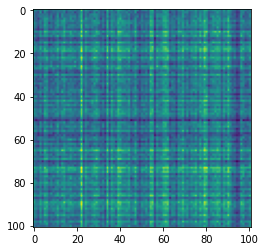

In [11]:
plt.imshow(xtrue, vmin=np.min(xtrue), vmax=np.max(xtrue))

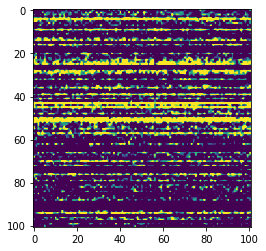

In [12]:
plt.imshow(ret_prod-xtrue, vmin=np.min(xtrue)*.1, vmax=np.max(xtrue)*.1)